In [15]:
import requests
import pandas as pd
import json
import plotly.graph_objects as go

In [2]:
# Set parameters for API call

# Longitude and latitude of desired location
# Set to Snoqualmie Pass ski area
longitude = -121.405
latitude = 47.41

# Select product type from Astro, Civil, Civillight, Meteo or Two
product = "meteo"


In [12]:

# Dynamic URL pulls in variables set above
url = f"http://www.7timer.info/bin/api.pl?lon={longitude}&&lat={latitude}&product={product}&output=json"

# Call API in json
response = requests.get(url).json()

# Print json file 
# print(json.dumps(response, indent=4, sort_keys=True))

# Convert to dataframe
df = pd.json_normalize(response, record_path="dataseries")
df.head()

,timepoint,cloudcover,highcloud,midcloud,lowcloud,rh_profile,wind_profile,temp2m,lifted_index,rh2m,msl_pressure,prec_type,prec_amount,snow_depth,wind10m.direction,wind10m.speed
0,3,4,-9999,-9999,-9999,"[{'layer': '950mb', 'rh': -9999}, {'layer': '9...","[{'layer': '950mb', 'direction': -9999, 'speed...",-5,15,15,1038,none,0,9,315,2
1,6,7,-9999,-9999,-9999,"[{'layer': '950mb', 'rh': -9999}, {'layer': '9...","[{'layer': '950mb', 'direction': -9999, 'speed...",-5,15,14,1038,none,0,9,350,2
2,9,9,-9999,-9999,-9999,"[{'layer': '950mb', 'rh': -9999}, {'layer': '9...","[{'layer': '950mb', 'direction': -9999, 'speed...",-2,15,14,1037,none,0,9,310,2
3,12,9,-9999,-9999,-9999,"[{'layer': '950mb', 'rh': -9999}, {'layer': '9...","[{'layer': '950mb', 'direction': -9999, 'speed...",0,10,15,1036,none,0,9,300,2
4,15,9,-9999,-9999,-9999,"[{'layer': '950mb', 'rh': -9999}, {'layer': '9...","[{'layer': '950mb', 'direction': -9999, 'speed...",1,15,16,1034,none,0,9,300,2


In [13]:
# drop columns
df = df.drop(columns=["highcloud","midcloud","lowcloud","rh_profile","wind_profile"])
df

,timepoint,cloudcover,temp2m,lifted_index,rh2m,msl_pressure,prec_type,prec_amount,snow_depth,wind10m.direction,wind10m.speed
0,3,4,-5,15,15,1038,none,0,9,315,2
1,6,7,-5,15,14,1038,none,0,9,350,2
2,9,9,-2,15,14,1037,none,0,9,310,2
3,12,9,0,10,15,1036,none,0,9,300,2
4,15,9,1,15,16,1034,none,0,9,300,2
...,...,...,...,...,...,...,...,...,...,...,...
59,180,9,-1,15,12,1022,none,3,9,120,2
60,183,9,-1,15,13,1020,none,3,9,120,2
61,186,9,-2,15,14,1020,none,3,9,115,2
62,189,9,-3,15,15,1021,none,3,9,110,2


In [14]:
# Assign a ski day rating

# ideal = prec type none and prec type minux X includes snow
# wind speed low and not increasing

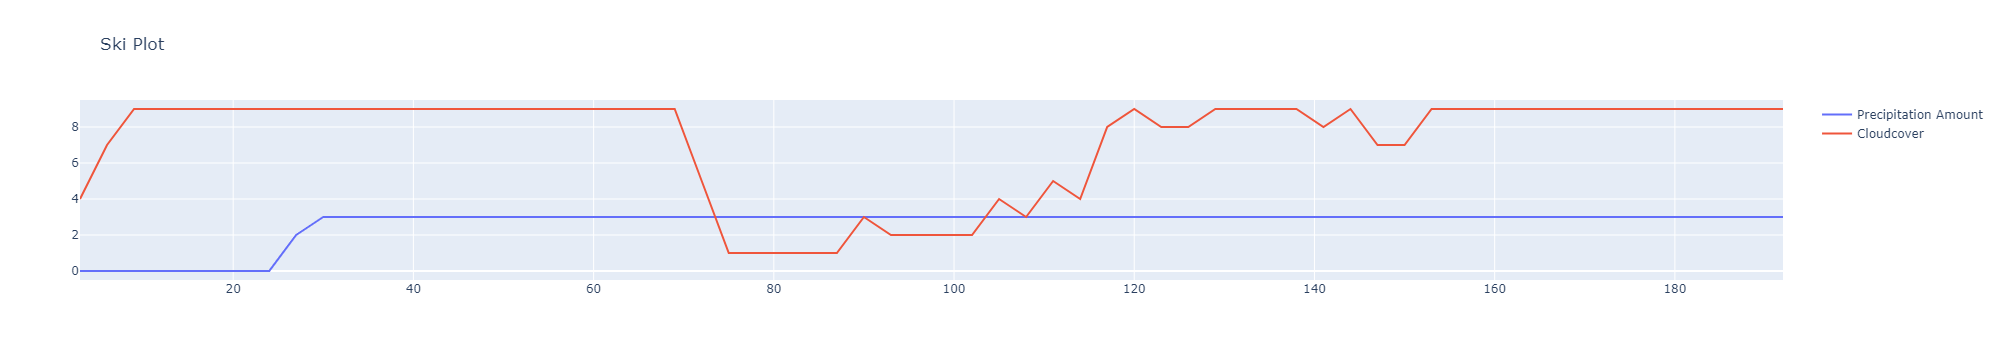

In [25]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["timepoint"],
    y=df["prec_amount"],
    name="Precipitation Amount"
))

fig.add_trace(go.Scatter(
    x=df["timepoint"],
    y=df["cloudcover"],
    name="Cloudcover"
))

fig.update_layout(    
    title="Ski Plot"
)

fig